## Loading the Data

In [7]:
import os
folder_path = r"C:\Users\anasu\Desktop\Final assignment.MSC1118H"
os.chdir(folder_path)

In [8]:
os.getcwd()

'C:\\Users\\anasu\\Desktop\\Final assignment.MSC1118H'

In [9]:
os.listdir()

['.ipynb_checkpoints',
 'Final_assignment_anasua_kundu.ipynb',
 'models.BERT.html',
 'models.html',
 'results',
 'test.txt',
 'train.txt',
 'val.txt']

In [11]:
for directory, subdiries, file in os.walk("./"):
  print("Directory is:", directory, "subdirectories are:", subdiries, "hosted files are:", file)

Directory is: ./ subdirectories are: ['.ipynb_checkpoints', 'results'] hosted files are: ['Final_assignment_anasua_kundu.ipynb', 'models.BERT.html', 'models.html', 'test.txt', 'train.txt', 'val.txt']
Directory is: ./.ipynb_checkpoints subdirectories are: [] hosted files are: ['Final_assignment_anasua_kundu-checkpoint.ipynb']
Directory is: ./results subdirectories are: [] hosted files are: []


In [12]:
import pandas as pd

def load_dataset(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        abstracts, labels, abstract_ids = [], [], []
        current_abstract, current_labels = [], []
        abstract_id = None
        for line in file:
            if line.strip():
                if line.startswith("###"):
                    if current_abstract and current_labels:
                        # Append the list of sentences instead of joining them
                        abstracts.append(current_abstract)
                        labels.append(current_labels)
                        abstract_ids.append(abstract_id)
                        current_abstract, current_labels = [], []
                    abstract_id = line.strip().replace("###", "")
                    continue
                parts = line.split("\t")
                if len(parts) == 2:
                    current_labels.append(parts[0])
                    current_abstract.append(parts[1].strip())
                else:
                    print(f"Skipping malformed line: {line.strip()}")
            else:
                if current_abstract and current_labels and abstract_id:
                    abstracts.append(current_abstract)
                    labels.append(current_labels)
                    abstract_ids.append(abstract_id)
                    current_abstract, current_labels = [], []

        if current_abstract and current_labels and abstract_id:
            abstracts.append(current_abstract)
            labels.append(current_labels)
            abstract_ids.append(abstract_id)

    return abstracts, labels, abstract_ids


# Load the training, validation, and test sets
train_abstracts, train_labels, train_abstract_ids = load_dataset('./train.txt')
val_abstracts, val_labels, val_abstract_ids = load_dataset('./val.txt')
test_abstracts, test_labels, test_abstract_ids = load_dataset('./test.txt')

# Basic Data Exploration
print(f"Number of training abstracts: {len(train_abstracts)}, {len(train_labels)}, {len(train_abstract_ids)}")
print(f"Number of validation abstracts: {len(val_abstracts)}, {len(val_labels)}, {len(val_abstract_ids)}")
print(f"Number of test abstracts: {len(test_abstracts)}, {len(test_abstracts)}, {len(test_abstracts)}")

# Examine a sample abstract and its labels
sample_index = 0  # Change this to explore other abstracts
print("\nSample Abstract ID:")
print(test_abstract_ids[sample_index])
print("\nSample Abstract:")
print(test_abstracts[sample_index])
print("\nLabels:")
print(test_labels[sample_index])


Number of training abstracts: 190654, 190654, 190654
Number of validation abstracts: 2500, 2500, 2500
Number of test abstracts: 2500, 2500, 2500

Sample Abstract ID:
24562799

Sample Abstract:
['Many pathogenic processes and diseases are the result of an erroneous activation of the complement cascade and a number of inhibitors of complement have thus been examined for anti-inflammatory actions .', 'It was recently demonstrated that supraphysiological concentrations of the endogenous complement inhibitor MAp44 ( also denoted MAP1 ) protect against myocardial reperfusion injury .', 'In the present study , we examined the association between outcome after acute myocardial infarction ( MI ) and the plasma levels of MAp44 and its related proteins MASP-1 and MASP-3 in patients with first-time MI .', 'In addition , we compared plasma levels of MAp44 , MASP-1 , and MASP-3 in MI patients to levels in a healthy control group .', 'A total of 192 MI patients and 140 control persons were included .

In [16]:
# Function to get unique labels and count sentences per class
def explore_data(labels_list):
    unique_labels = set()
    sentences_per_class = {}

    for labels in labels_list:
        for label in labels:
            unique_labels.add(label)
            if label in sentences_per_class:
                sentences_per_class[label] += 1
            else:
                sentences_per_class[label] = 1

    return unique_labels, sentences_per_class

# Exploring the datasets
unique_labels_train, sentences_per_class_train = explore_data(train_labels)
unique_labels_val, sentences_per_class_val = explore_data(val_labels)
unique_labels_test, sentences_per_class_test = explore_data(test_labels)

# Displaying the results for the training set
print(f"Unique Labels in Training Set: {unique_labels_train}")
print(f"Sentences per Class in Training Set: {sentences_per_class_train}")

# Displaying the results for the validation set
print(f"Unique Labels in Validation Set: {unique_labels_val}")
print(f"Sentences per Class in Validation Set: {sentences_per_class_val}")

# Displaying the results for the test set
print(f"Unique Labels in Test Set: {unique_labels_test}")
print(f"Sentences per Class in Test Set: {sentences_per_class_test}")


Unique Labels in Training Set: {'METHODS', 'RESULTS', 'CONCLUSIONS', 'BACKGROUND', 'OBJECTIVE'}
Sentences per Class in Training Set: {'BACKGROUND': 196689, 'METHODS': 722586, 'CONCLUSIONS': 339714, 'RESULTS': 766271, 'OBJECTIVE': 186601}
Unique Labels in Validation Set: {'METHODS', 'RESULTS', 'CONCLUSIONS', 'BACKGROUND', 'OBJECTIVE'}
Sentences per Class in Validation Set: {'BACKGROUND': 2575, 'RESULTS': 9977, 'CONCLUSIONS': 4396, 'OBJECTIVE': 2425, 'METHODS': 9559}
Unique Labels in Test Set: {'METHODS', 'RESULTS', 'CONCLUSIONS', 'BACKGROUND', 'OBJECTIVE'}
Sentences per Class in Test Set: {'BACKGROUND': 2663, 'METHODS': 9751, 'RESULTS': 10276, 'CONCLUSIONS': 4426, 'OBJECTIVE': 2377}


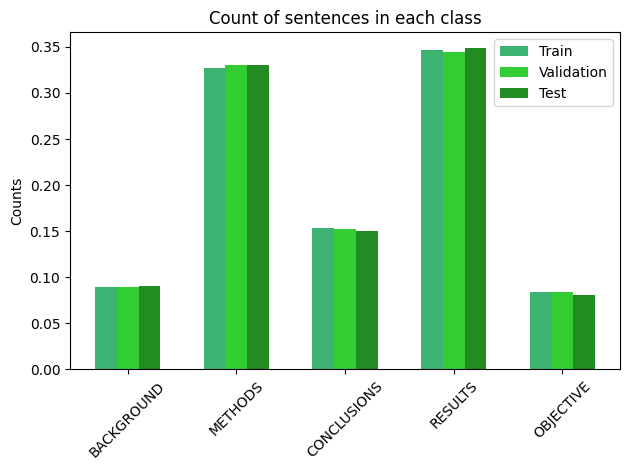

In [17]:
import matplotlib.pyplot as plt
# Calculate the total number of sentences in each dataset
total_sentences_train = sum(sentences_per_class_train.values())
total_sentences_val = sum(sentences_per_class_val.values())
total_sentences_test = sum(sentences_per_class_test.values())

# Converting to a format suitable for plotting
labels = sentences_per_class_train.keys()
train_counts = [sentences_per_class_train[label]/total_sentences_train for label in labels]
val_counts = [sentences_per_class_val[label]/total_sentences_val for label in labels]
test_counts = [sentences_per_class_test[label]/total_sentences_test for label in labels]

x = range(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
train_color = 'mediumseagreen'  # A moderate green
val_color = 'limegreen'  # A bright green
test_color = 'forestgreen'  # A deep green

rects1 = ax.bar(x, train_counts, width, label='Train', color=train_color)
rects2 = ax.bar([p + width for p in x], val_counts, width, label='Validation', color=val_color)
rects3 = ax.bar([p + width * 2 for p in x], test_counts, width, label='Test', color=test_color)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Count of sentences in each class')
ax.set_xticks([p + width for p in x])
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [18]:
# Double check
sum(train_counts)

1.0

##Data Filteration (Part1)
Since the dataset is huge and given the colab's limits, we have to work with a subset. THerefore, we only consider 'BACKGROUND', 'METHODS', and 'RESULTS'

In [19]:
def class_remover(input_abstracts, input_labels, input_abstract_ids):
    # Define the labels you want to keep
    allowed_labels = ['BACKGROUND', 'METHODS', 'RESULTS']

    # Initialize output lists
    output_abstracts, output_labels, output_abstract_ids = [], [], []

    # Iterate over each abstract, its labels, and its id
    for abstract, labels, abstract_id in zip(input_abstracts, input_labels, input_abstract_ids):
        # Filter sentences in the current abstract based on allowed labels
        filtered_pairs = [(sentence, label) for sentence, label in zip(abstract, labels) if label in allowed_labels]

        # Check if there are any sentences left after filtering
        if filtered_pairs:
            # Unpack sentences and labels from filtered pairs
            filtered_abstract, filtered_labels = zip(*filtered_pairs)
            # Add the filtered sentences and their labels to the output lists
            output_abstracts.append(list(filtered_abstract))
            output_labels.append(list(filtered_labels))
            output_abstract_ids.append(abstract_id)

    return output_abstracts, output_labels, output_abstract_ids


train_abstracts, train_labels, train_abstract_ids = class_remover(train_abstracts, train_labels, train_abstract_ids)
val_abstracts, val_labels, val_abstract_ids = class_remover(val_abstracts, val_labels, val_abstract_ids)
test_abstracts, test_labels, test_abstract_ids = class_remover(test_abstracts, test_labels, test_abstract_ids)

# Basic Data Exploration
print(f"Number of training abstracts: {len(train_abstracts)}, {len(train_labels)}, {len(train_abstract_ids)}")
print(f"Number of validation abstracts: {len(val_abstracts)}, {len(val_labels)}, {len(val_abstract_ids)}")
print(f"Number of test abstracts: {len(test_abstracts)}, {len(test_abstracts)}, {len(test_abstracts)}")

# Examine a sample abstract and its labels
sample_index = 0  # Change this to explore other abstracts
print("\nSample Abstract ID:")
print(test_abstract_ids[sample_index])
print("\nSample Abstract:")
print(test_abstracts[sample_index])
print("\nLabels:")
print(test_labels[sample_index])

Number of training abstracts: 190647, 190647, 190647
Number of validation abstracts: 2500, 2500, 2500
Number of test abstracts: 2500, 2500, 2500

Sample Abstract ID:
24562799

Sample Abstract:
['Many pathogenic processes and diseases are the result of an erroneous activation of the complement cascade and a number of inhibitors of complement have thus been examined for anti-inflammatory actions .', 'It was recently demonstrated that supraphysiological concentrations of the endogenous complement inhibitor MAp44 ( also denoted MAP1 ) protect against myocardial reperfusion injury .', 'In the present study , we examined the association between outcome after acute myocardial infarction ( MI ) and the plasma levels of MAp44 and its related proteins MASP-1 and MASP-3 in patients with first-time MI .', 'In addition , we compared plasma levels of MAp44 , MASP-1 , and MASP-3 in MI patients to levels in a healthy control group .', 'A total of 192 MI patients and 140 control persons were included .

In [20]:
# Function to get unique labels and count sentences per class
def explore_data(labels_list):
    unique_labels = set()
    sentences_per_class = {}

    for labels in labels_list:
        for label in labels:
            unique_labels.add(label)
            if label in sentences_per_class:
                sentences_per_class[label] += 1
            else:
                sentences_per_class[label] = 1

    return unique_labels, sentences_per_class

# Exploring the datasets
unique_labels_train, sentences_per_class_train = explore_data(train_labels)
unique_labels_val, sentences_per_class_val = explore_data(val_labels)
unique_labels_test, sentences_per_class_test = explore_data(test_labels)

# Displaying the results for the training set
print(f"Unique Labels in Training Set: {unique_labels_train}")
print(f"Sentences per Class in Training Set: {sentences_per_class_train}")

# Displaying the results for the validation set
print(f"Unique Labels in Validation Set: {unique_labels_val}")
print(f"Sentences per Class in Validation Set: {sentences_per_class_val}")

# Displaying the results for the test set
print(f"Unique Labels in Test Set: {unique_labels_test}")
print(f"Sentences per Class in Test Set: {sentences_per_class_test}")

Unique Labels in Training Set: {'RESULTS', 'METHODS', 'BACKGROUND'}
Sentences per Class in Training Set: {'BACKGROUND': 196689, 'METHODS': 722586, 'RESULTS': 766271}
Unique Labels in Validation Set: {'RESULTS', 'METHODS', 'BACKGROUND'}
Sentences per Class in Validation Set: {'BACKGROUND': 2575, 'RESULTS': 9977, 'METHODS': 9559}
Unique Labels in Test Set: {'RESULTS', 'METHODS', 'BACKGROUND'}
Sentences per Class in Test Set: {'BACKGROUND': 2663, 'METHODS': 9751, 'RESULTS': 10276}


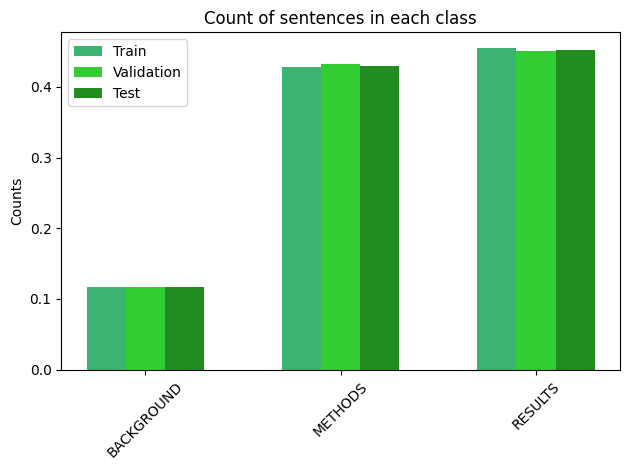

In [21]:
import matplotlib.pyplot as plt
# Calculate the total number of sentences in each dataset
total_sentences_train = sum(sentences_per_class_train.values())
total_sentences_val = sum(sentences_per_class_val.values())
total_sentences_test = sum(sentences_per_class_test.values())

# Converting to a format suitable for plotting
labels = sentences_per_class_train.keys()
train_counts = [sentences_per_class_train[label]/total_sentences_train for label in labels]
val_counts = [sentences_per_class_val[label]/total_sentences_val for label in labels]
test_counts = [sentences_per_class_test[label]/total_sentences_test for label in labels]

x = range(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
train_color = 'mediumseagreen'  # A moderate green
val_color = 'limegreen'  # A bright green
test_color = 'forestgreen'  # A deep green

rects1 = ax.bar(x, train_counts, width, label='Train', color=train_color)
rects2 = ax.bar([p + width for p in x], val_counts, width, label='Validation', color=val_color)
rects3 = ax.bar([p + width * 2 for p in x], test_counts, width, label='Test', color=test_color)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Count of sentences in each class')
ax.set_xticks([p + width for p in x])
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Reproducible Results

In [24]:
# Seeding (to get reproducable results)
import torch
import numpy as np
import random
def random_seed(seed_value, use_cuda):
    """
    Parameters
    ----------
    seed_value : int
        The desired seed number
    use_cuda : Boolean
        True if GPU seeding is desired, False, otherwise

    Returns
    -------
    None.
    """
    np.random.seed(seed_value) # numpy seed
    torch.manual_seed(seed_value) # torch cpu vars
    random.seed(seed_value) # Python seed
    if use_cuda:
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value) # torch gpu vars
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

random_seed(0, True)

##Data Filteration (Part 2)
Still the dataset is too large for free version of Google Colab. We need 6K, 2K, and 2K examples for training, validation, and test, respectively

In [26]:
# Flatten the abstract lists
train_sentences = [sentence for sublist in train_abstracts for sentence in sublist]
val_sentences = [sentence for sublist in val_abstracts for sentence in sublist]
test_sentences = [sentence for sublist in test_abstracts for sentence in sublist]

In [27]:
from sklearn.preprocessing import LabelEncoder

# Flatten the label lists
train_labels_flat = [label for sublist in train_labels for label in sublist]
val_labels_flat = [label for sublist in val_labels for label in sublist]
test_labels_flat = [label for sublist in test_labels for label in sublist]

# Applying label encoding
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels_flat)
val_labels_encoded = label_encoder.transform(val_labels_flat)
test_labels_encoded = label_encoder.transform(test_labels_flat)

# Verify the encoding
print(f"Classes: {label_encoder.classes_}")
print(f"Encoded Train Labels Sample: {train_labels_encoded[:3]}")
print(f"Encoded Validation Labels Sample: {val_labels_encoded[:3]}")
print(f"Encoded Test Labels Sample: {test_labels_encoded[:3]}")
print(f"Flattened Test Sentences Sample: {test_sentences[:3]}")


Classes: ['BACKGROUND' 'METHODS' 'RESULTS']
Encoded Train Labels Sample: [0 0 1]
Encoded Validation Labels Sample: [0 2 2]
Encoded Test Labels Sample: [0 0 0]
Flattened Test Sentences Sample: ['Many pathogenic processes and diseases are the result of an erroneous activation of the complement cascade and a number of inhibitors of complement have thus been examined for anti-inflammatory actions .', 'It was recently demonstrated that supraphysiological concentrations of the endogenous complement inhibitor MAp44 ( also denoted MAP1 ) protect against myocardial reperfusion injury .', 'In the present study , we examined the association between outcome after acute myocardial infarction ( MI ) and the plasma levels of MAp44 and its related proteins MASP-1 and MASP-3 in patients with first-time MI .']


In [28]:
# Double check
print(len(train_sentences))
print(len(train_labels_encoded))
print("################")
print(len(val_sentences))
print(len(val_labels_encoded))
print("################")
print(len(test_sentences))
print(len(test_labels_encoded))

1685546
1685546
################
22111
22111
################
22690
22690


In [29]:
from sklearn.model_selection import train_test_split

# Stratified subsampling for the training set
train_sentences_sub, _, train_labels_encoded_sub, _ = train_test_split(
    train_sentences, train_labels_encoded, train_size=6000, stratify=train_labels_encoded, random_state=0)

# Stratified subsampling for the validation set
val_sentences_sub, _, val_labels_encoded_sub, _ = train_test_split(
    val_sentences, val_labels_encoded, train_size=2000, stratify=val_labels_encoded, random_state=0)

# Stratified subsampling for the test set
test_sentences_sub, _, test_labels_encoded_sub, _ = train_test_split(
    test_sentences, test_labels_encoded, train_size=2000, stratify=test_labels_encoded, random_state=0)

# Verify the sizes
print(f"Subsampled Train Sentences: {len(train_sentences_sub)} - Expected: 6000")
print(f"Subsampled Validation Sentences: {len(val_sentences_sub)} - Expected: 2000")
print(f"Subsampled Test Sentences: {len(test_sentences_sub)} - Expected: 2000")


Subsampled Train Sentences: 6000 - Expected: 6000
Subsampled Validation Sentences: 2000 - Expected: 2000
Subsampled Test Sentences: 2000 - Expected: 2000


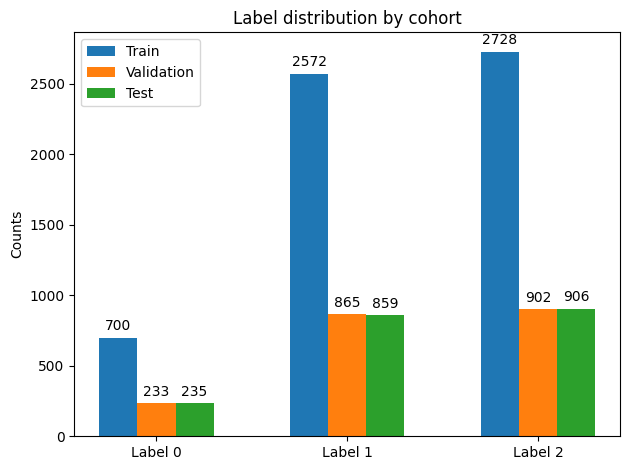

In [30]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)  # For reproducibility

# Calculate the label counts for each set
train_counts = np.bincount(train_labels_encoded_sub, minlength=3)
val_counts = np.bincount(val_labels_encoded_sub, minlength=3)
test_counts = np.bincount(test_labels_encoded_sub, minlength=3)

# Define labels for the plot
labels = ['Label 0', 'Label 1', 'Label 2']

# Define positions of the bars
x = np.arange(len(labels))

# Width of the bars
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, train_counts, width, label='Train')
rects2 = ax.bar(x, val_counts, width, label='Validation')
rects3 = ax.bar(x + width, test_counts, width, label='Test')

ax.set_ylabel('Counts')
ax.set_title('Label distribution by cohort')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to autolabel the bars with their counts
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()


In [32]:
train_sentences = train_sentences_sub
train_labels_encoded = train_labels_encoded_sub

val_sentences = val_sentences_sub
val_labels_encoded = val_labels_encoded_sub

test_sentences = test_sentences_sub
test_labels_encoded = test_labels_encoded_sub

##Baseline

In [33]:
def extract_features(sentences):
    features = []
    for sentence in sentences:
        char_count = len(sentence) # - Character Count
        word_count = len(sentence.split()) # - Word Count
        avg_word_length = char_count / word_count if word_count else 0 # - Average Word Length
        vocabulary_richness = len(set(sentence.split())) / word_count if word_count else 0 # - Vocabulary Richness
        features.append([char_count, word_count, avg_word_length, vocabulary_richness])
    return np.array(features)

X_train = extract_features(train_sentences)
y_train = np.array(train_labels_encoded)

X_val = extract_features(val_sentences)
y_val = np.array(val_labels_encoded)

X_test = extract_features(test_sentences)
y_test = np.array(test_labels_encoded)

In [34]:
# double_check
X_train[0]

array([319.        ,  60.        ,   5.31666667,   0.6       ])

Accuracy baseline

Baseline Accuracy is: 0.453


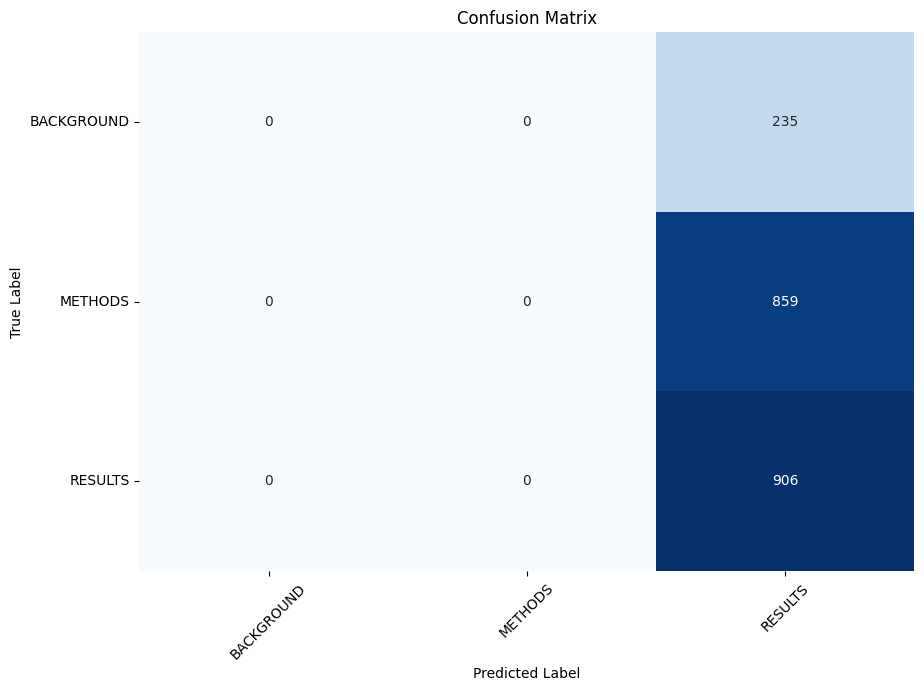

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

most_frequent_class = np.bincount(y_train).argmax()

# Create predictions for the test set
y_pred = np.full_like(y_test, fill_value=most_frequent_class)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

# Generate the confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_pred)

print("Baseline Accuracy is:", accuracy)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.xticks(ticks=np.arange(len(label_encoder.classes_)) + 0.5, labels=label_encoder.classes_, rotation=45)
plt.yticks(ticks=np.arange(len(label_encoder.classes_)) + 0.5, labels=label_encoder.classes_, rotation=0)

plt.show()



##Baseline model with basic features

Accuracy of XGB with basic features is 0.522
The operation took  0.55  seconds


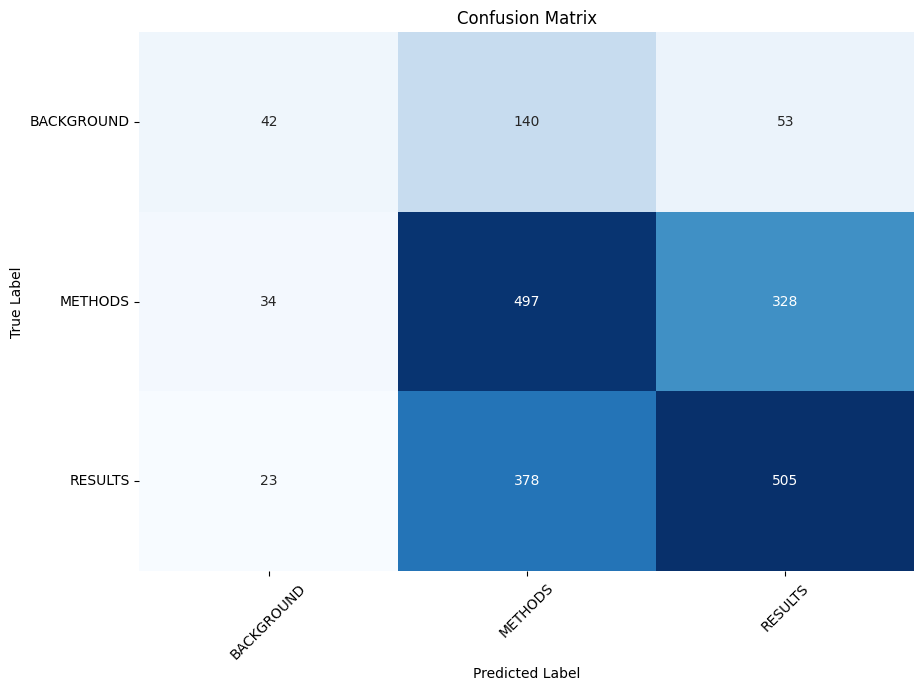

In [38]:
random_seed(0, True)
from xgboost import XGBClassifier
import time
start_time = time.time() #time the ops
clf = XGBClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy of XGB with basic features is", accuracy_score(y_test, y_pred))
#time the ops
end_time = time.time()
elapsed_time = end_time - start_time
print("The operation took ", round(elapsed_time, 2), " seconds")

# Generate the confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.xticks(ticks=np.arange(len(label_encoder.classes_)) + 0.5, labels=label_encoder.classes_, rotation=45)
plt.yticks(ticks=np.arange(len(label_encoder.classes_)) + 0.5, labels=label_encoder.classes_, rotation=0)

plt.show()

## **FInal Assignment**

## No. 1: Grid Search



In [39]:
random_seed(0, True)

# Defining hyperparameters
max_depth_values = [3, 4]
learning_rate_values = [0.1, 0.01]

# Defining accuracy
accuracy_dict = {}

# Loop through each combination of hyperparameters
for max_depth in max_depth_values:
    for learning_rate in learning_rate_values:
        clf = XGBClassifier(max_depth=max_depth, learning_rate=learning_rate, random_state=0)
        start_time = time.time()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        end_time = time.time()
        elapsed_time = end_time - start_time
        print("Training time:", round(elapsed_time, 2), " seconds")

        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_pred)
        accuracy_dict[(max_depth, learning_rate)] = accuracy

# individual accuracies for each hyperparameter combination
print("\nIndividual accuracies for each hyperparameter combination:")
for hyperparams, accuracy in accuracy_dict.items():
    max_depth, learning_rate = hyperparams
    print(f"max_depth={max_depth}, learning_rate={learning_rate}: {accuracy}")

# best accuracy and corresponding hyperparameters
best_hyperparameters = max(accuracy_dict, key=accuracy_dict.get)
best_accuracy = accuracy_dict[best_hyperparameters]
print("\nBest hyperparameters:", best_hyperparameters)
print("Best accuracy:", best_accuracy)

Training time: 0.27  seconds
Training time: 0.26  seconds
Training time: 0.32  seconds
Training time: 0.34  seconds

Individual accuracies for each hyperparameter combination:
max_depth=3, learning_rate=0.1: 0.5445
max_depth=3, learning_rate=0.01: 0.551
max_depth=4, learning_rate=0.1: 0.5365
max_depth=4, learning_rate=0.01: 0.5395

Best hyperparameters: (3, 0.01)
Best accuracy: 0.551


#Best Hyper parameters were max depth: 3 and learning time 0.01
The accuracy of the model was 0.551

## No. 2: Update the model with best hyperparameters and show confusion matrix and multiclass F1 Score

The operation took  31.15  seconds


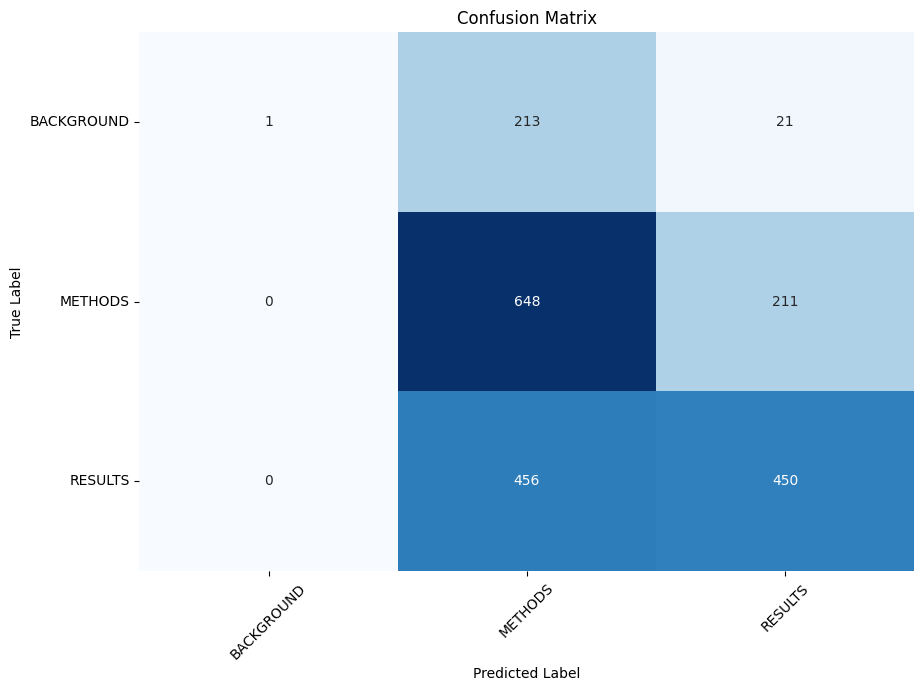

Average F1 score for the XGBoost model is: 0.5495 with 95% Confidence Interval of [ 0.5495 , 0.5495 ]


In [40]:
###Update the model with best hyperparameters
# Combining train and validation set
combined_X_train_val = np.concatenate((X_train, X_val), axis=0)
combined_y_train_val = np.concatenate((y_train, y_val), axis=0)

#Building final XGboost model
random_seed(0, True)
start_time = time.time()
N = 100 #number of experiments
experiments_performances = []
for i in range(N):
  clf = XGBClassifier(max_depth=3, learning_rate=0.01, random_state=0)
  clf.fit(combined_X_train_val, combined_y_train_val)
  y_pred = clf.predict(X_test)

#time the ops
end_time = time.time()
elapsed_time = end_time - start_time
print("The operation took ", round(elapsed_time, 2), " seconds")

# Generate the confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.xticks(ticks=np.arange(len(label_encoder.classes_)) + 0.5, labels=label_encoder.classes_, rotation=45)
plt.yticks(ticks=np.arange(len(label_encoder.classes_)) + 0.5, labels=label_encoder.classes_, rotation=0)

plt.show()

###Multiclass F1 score
from sklearn.metrics import f1_score
experiments_performances.append(f1_score(y_test, y_pred, average='micro'))
mean_performance = np.mean(experiments_performances)
std_performance = np.std(experiments_performances)
CI_start = mean_performance - 1.96 * std_performance/np.sqrt(N)
CI_end = mean_performance + 1.96 * std_performance/np.sqrt(N)
print("Average F1 score for the XGBoost model is:", mean_performance, "with 95% Confidence Interval of [", CI_start, ',', CI_end, ']' )


#Multiclass average F1 score for the XGBoost model is: 0.55 with 95% Confidence Interval of [0.55 , 0.55]

### No. 3: LSTM model with same basic features

In [41]:
import torch
import torch.nn as nn

# Define improved LSTM model
class ImprovedLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=2, bidirectional=False, dropout_rate=0.5):
        super(ImprovedLSTM, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers,
                            batch_first=True, bidirectional=bidirectional, dropout=dropout_rate)
        self.fc = nn.Linear(hidden_dim * (2 if bidirectional else 1), output_dim)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        x = self.dropout(x)
        x, (h_n, c_n) = self.lstm(x)
        # If bidirectional, concatenate the final forward and backward hidden state
        if self.lstm.bidirectional:
            x = torch.cat((h_n[-2,:,:], h_n[-1,:,:]), dim = 1)
        else:
            x = h_n[-1,:,:]
        x = self.dropout(x)
        x = self.fc(x)
        return x

##Staring with epoch 5

In [42]:
random_seed(0, True)
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import torch.optim as optim
import time

# Set device for PyTorch (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Standardize features of X_train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
X_train_scaled = X_train_scaled.unsqueeze(1)

# Convert y_train labels to a PyTorch tensor
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long).to(device)

# Standardize features of X_val
scaler = StandardScaler()
X_val_scaled = scaler.fit_transform(X_val)
X_val_scaled = torch.tensor(X_val_scaled, dtype=torch.float32).to(device)
X_val_scaled = X_val_scaled.unsqueeze(1)

# Convert y_val labels to a PyTorch tensor
label_encoder = LabelEncoder()
y_val_encoded = label_encoder.fit_transform(y_val)
y_val_tensor = torch.tensor(y_val_encoded, dtype=torch.long).to(device)

# Hyperparameters
learning_rate = 0.001
epochs = 5

# Initialize the LSTM model
input_dim = X_train_scaled.shape[2]
hidden_dim = 10
output_dim = 3
model = ImprovedLSTM(input_dim=input_dim, hidden_dim=50, output_dim=3, num_layers=2, bidirectional=True, dropout_rate=0.5)
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Start time
start_time = time.time()
N = 100  # number of experiments
experiments_performances = []
for i in range(N):
    if i%10==0:
      print("working on experimnet ", i, ' from ', N)
      # Training loop
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_scaled)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

    # Evaluate the model
    model.eval()
with torch.no_grad():
    outputs = model(X_val_scaled)
    predictions = torch.softmax(outputs, dim=1)
    auc_score = roc_auc_score(y_val_tensor.cpu(), predictions.cpu(), multi_class='ovr')
    experiments_performances.append(auc_score)

mean_performance = np.mean(experiments_performances)
std_performance = np.std(experiments_performances)
CI_start = mean_performance - 1.96 * std_performance/np.sqrt(N)
CI_end = mean_performance + 1.96 * std_performance/np.sqrt(N)
print("Average AUC performance for the advanced LSTM model is:", mean_performance, "with 95% Confidence Interval of [", CI_start, ',', CI_end, ']' )
#time the ops
end_time = time.time()
elapsed_time = end_time - start_time
print("The operation took ", round(elapsed_time, 2), " seconds")

working on experimnet  0  from  100
working on experimnet  10  from  100
working on experimnet  20  from  100
working on experimnet  30  from  100
working on experimnet  40  from  100
working on experimnet  50  from  100
working on experimnet  60  from  100
working on experimnet  70  from  100
working on experimnet  80  from  100
working on experimnet  90  from  100
Average AUC performance for the advanced LSTM model is: 0.6674387787457169 with 95% Confidence Interval of [ 0.6674387787457169 , 0.6674387787457169 ]
The operation took  32.58  seconds


##Changing epoch to 25

In [43]:
random_seed(0, True)

# Set device for PyTorch (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Standardize features of X_train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
X_train_scaled = X_train_scaled.unsqueeze(1)

# Convert y_train labels to a PyTorch tensor
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long).to(device)

# Standardize features of X_val
scaler = StandardScaler()
X_val_scaled = scaler.fit_transform(X_val)
X_val_scaled = torch.tensor(X_val_scaled, dtype=torch.float32).to(device)
X_val_scaled = X_val_scaled.unsqueeze(1)

# Convert y_val labels to a PyTorch tensor
label_encoder = LabelEncoder()
y_val_encoded = label_encoder.fit_transform(y_val)
y_val_tensor = torch.tensor(y_val_encoded, dtype=torch.long).to(device)

# Hyperparameters
learning_rate = 0.001
epochs = 25

# Initialize the LSTM model
input_dim = X_train_scaled.shape[2]
model = ImprovedLSTM(input_dim=input_dim, hidden_dim=50, output_dim=3, num_layers=2, bidirectional=True, dropout_rate=0.5)
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Start time
start_time = time.time()
N = 100  # number of experiments
experiments_performances = []
for i in range(N):
    if i%10==0:
      print("working on experimnet ", i, ' from ', N)
      # Training loop
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_scaled)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

    # Evaluate the model
    model.eval()
with torch.no_grad():
    outputs = model(X_val_scaled)
    predictions = torch.softmax(outputs, dim=1)
    auc_score = roc_auc_score(y_val_tensor.cpu(), predictions.cpu(), multi_class='ovr')
    experiments_performances.append(auc_score)

mean_performance = np.mean(experiments_performances)
std_performance = np.std(experiments_performances)
CI_start = mean_performance - 1.96 * std_performance/np.sqrt(N)
CI_end = mean_performance + 1.96 * std_performance/np.sqrt(N)
print("Average AUC performance for the advanced LSTM model is:", mean_performance, "with 95% Confidence Interval of [", CI_start, ',', CI_end, ']' )
#time the ops
end_time = time.time()
elapsed_time = end_time - start_time
print("The operation took ", round(elapsed_time, 2), " seconds")

working on experimnet  0  from  100
working on experimnet  10  from  100
working on experimnet  20  from  100
working on experimnet  30  from  100
working on experimnet  40  from  100
working on experimnet  50  from  100
working on experimnet  60  from  100
working on experimnet  70  from  100
working on experimnet  80  from  100
working on experimnet  90  from  100
Average AUC performance for the advanced LSTM model is: 0.6785114804709825 with 95% Confidence Interval of [ 0.6785114804709825 , 0.6785114804709825 ]
The operation took  160.62  seconds


##Changing epoch to 50

In [44]:
random_seed(0, True)

# Set device for PyTorch (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Standardize features of X_train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
X_train_scaled = X_train_scaled.unsqueeze(1)

# Convert y_train labels to a PyTorch tensor
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long).to(device)

# Standardize features of X_val
scaler = StandardScaler()
X_val_scaled = scaler.fit_transform(X_val)
X_val_scaled = torch.tensor(X_val_scaled, dtype=torch.float32).to(device)
X_val_scaled = X_val_scaled.unsqueeze(1)

# Convert y_val labels to a PyTorch tensor
label_encoder = LabelEncoder()
y_val_encoded = label_encoder.fit_transform(y_val)
y_val_tensor = torch.tensor(y_val_encoded, dtype=torch.long).to(device)

# Hyperparameters
learning_rate = 0.001
epochs = 50

# Initialize the LSTM model
input_dim = X_train_scaled.shape[2]
hidden_dim = 10
output_dim = 3
model = ImprovedLSTM(input_dim=input_dim, hidden_dim=50, output_dim=3, num_layers=2, bidirectional=True, dropout_rate=0.5)
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Start time
start_time = time.time()
N = 100  # number of experiments
experiments_performances = []
for i in range(N):
    if i%10==0:
      print("working on experimnet ", i, ' from ', N)
      # Training loop
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_scaled)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

    # Evaluate the model
    model.eval()
with torch.no_grad():
    outputs = model(X_val_scaled)
    predictions = torch.softmax(outputs, dim=1)
    auc_score = roc_auc_score(y_val_tensor.cpu(), predictions.cpu(), multi_class='ovr')
    experiments_performances.append(auc_score)

mean_performance = np.mean(experiments_performances)
std_performance = np.std(experiments_performances)
CI_start = mean_performance - 1.96 * std_performance/np.sqrt(N)
CI_end = mean_performance + 1.96 * std_performance/np.sqrt(N)
print("Average AUC performance for the advanced LSTM model is:", mean_performance, "with 95% Confidence Interval of [", CI_start, ',', CI_end, ']' )
#time the ops
end_time = time.time()
elapsed_time = end_time - start_time
print("The operation took ", round(elapsed_time, 2), " seconds")

working on experimnet  0  from  100
working on experimnet  10  from  100
working on experimnet  20  from  100
working on experimnet  30  from  100
working on experimnet  40  from  100
working on experimnet  50  from  100
working on experimnet  60  from  100
working on experimnet  70  from  100
working on experimnet  80  from  100
working on experimnet  90  from  100
Average AUC performance for the advanced LSTM model is: 0.6695080028388626 with 95% Confidence Interval of [ 0.6695080028388626 , 0.6695080028388626 ]
The operation took  319.45  seconds


##changing epoch to 200

In [46]:
random_seed(0, True)

# Set device for PyTorch (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Standardize features of X_train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
X_train_scaled = X_train_scaled.unsqueeze(1)

# Convert y_train labels to a PyTorch tensor
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long).to(device)

# Standardize features of X_val
scaler = StandardScaler()
X_val_scaled = scaler.fit_transform(X_val)
X_val_scaled = torch.tensor(X_val_scaled, dtype=torch.float32).to(device)
X_val_scaled = X_val_scaled.unsqueeze(1)

# Convert y_val labels to a PyTorch tensor
label_encoder = LabelEncoder()
y_val_encoded = label_encoder.fit_transform(y_val)
y_val_tensor = torch.tensor(y_val_encoded, dtype=torch.long).to(device)

# Hyperparameters
learning_rate = 0.001
epochs = 200

# Initialize the LSTM model
input_dim = X_train_scaled.shape[2]
hidden_dim = 10
output_dim = 3
model = ImprovedLSTM(input_dim=input_dim, hidden_dim=50, output_dim=3, num_layers=2, bidirectional=True, dropout_rate=0.5)
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Start time
start_time = time.time()
N = 100  # number of experiments
experiments_performances = []
for i in range(N):
    if i%10==0:
      print("working on experimnet ", i, ' from ', N)
      # Training loop
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_scaled)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

    # Evaluate the model
    model.eval()
with torch.no_grad():
    outputs = model(X_val_scaled)
    predictions = torch.softmax(outputs, dim=1)
    auc_score = roc_auc_score(y_val_tensor.cpu(), predictions.cpu(), multi_class='ovr')
    experiments_performances.append(auc_score)

mean_performance = np.mean(experiments_performances)
std_performance = np.std(experiments_performances)
CI_start = mean_performance - 1.96 * std_performance/np.sqrt(N)
CI_end = mean_performance + 1.96 * std_performance/np.sqrt(N)
print("Average AUC performance for the advanced LSTM model with 200 epochs is:", mean_performance, "with 95% Confidence Interval of [", CI_start, ',', CI_end, ']' )
#time the ops
end_time = time.time()
elapsed_time = end_time - start_time
print("The operation took ", round(elapsed_time, 2), " seconds")

working on experimnet  0  from  100
working on experimnet  10  from  100
working on experimnet  20  from  100
working on experimnet  30  from  100
working on experimnet  40  from  100
working on experimnet  50  from  100
working on experimnet  60  from  100
working on experimnet  70  from  100
working on experimnet  80  from  100
working on experimnet  90  from  100
Average AUC performance for the advanced LSTM model is: 0.657310205719816 with 95% Confidence Interval of [ 0.657310205719816 , 0.657310205719816 ]
The operation took  1295.96  seconds


The best performance achieved with epoch 25. So, selecting this model for plotting training and validation loss and performance.

The operation took  2.14  seconds


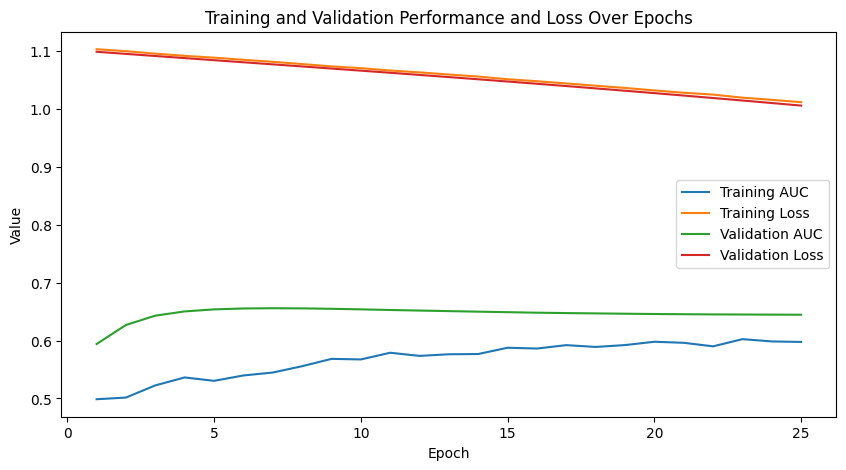

In [47]:
random_seed(0, True)

# Set device for PyTorch (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Standardize features of X_train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
X_train_scaled = X_train_scaled.unsqueeze(1)

# Convert y_train labels to a PyTorch tensor
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long).to(device)

# Standardize features of X_val
scaler = StandardScaler()
X_val_scaled = scaler.fit_transform(X_val)
X_val_scaled = torch.tensor(X_val_scaled, dtype=torch.float32).to(device)
X_val_scaled = X_val_scaled.unsqueeze(1)

# Convert y_val labels to a PyTorch tensor
label_encoder = LabelEncoder()
y_val_encoded = label_encoder.fit_transform(y_val)
y_val_tensor = torch.tensor(y_val_encoded, dtype=torch.long).to(device)

# Hyperparameters
learning_rate = 0.001
epochs = 25

# Initialize the LSTM model
input_dim = X_train_scaled.shape[2]
model = ImprovedLSTM(input_dim=input_dim, hidden_dim=50, output_dim=3, num_layers=2, bidirectional=True, dropout_rate=0.5)
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Lists to store training and validation metrics
train_performance_over_epochs = []
train_loss_over_epochs = []
val_performance_over_epochs = []
val_loss_over_epochs = []

# Start time
start_time = time.time()
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_scaled)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_predictions = torch.softmax(outputs, dim=1)
    train_auc_score = roc_auc_score(y_train_tensor.detach().cpu(), train_predictions.detach().cpu(), multi_class='ovr')
    train_performance_over_epochs.append(train_auc_score)
    train_loss_over_epochs.append(loss.item())

    # Evaluate the model on validation set
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_scaled)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_predictions = torch.softmax(val_outputs, dim=1)
        val_auc_score = roc_auc_score(y_val_tensor.cpu(), val_predictions.cpu(), multi_class='ovr')
        val_performance_over_epochs.append(val_auc_score)
        val_loss_over_epochs.append(val_loss.item())

#time the ops
end_time = time.time()
elapsed_time = end_time - start_time
print("The operation took ", round(elapsed_time, 2), " seconds")

#Plotting the metric monitoring figures
epochs = range(1, len(train_performance_over_epochs) + 1)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_performance_over_epochs, label='Training AUC')
plt.plot(epochs, train_loss_over_epochs, label='Training Loss')
plt.plot(epochs, val_performance_over_epochs, label='Validation AUC')
plt.plot(epochs, val_loss_over_epochs, label='Validation Loss')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training and Validation Performance and Loss Over Epochs')

# Adding a legend
plt.legend()

# Show the plot
plt.show()

Performance was higher for validation set compared to training set. Compared to performance, loss was always higher for both training and validation set.

### No. 4: Word2Vec model embedding and building LSTM models

In [52]:
os.chdir(r"C:\Users\anasu\Desktop\Final assignment.MSC1118H\models")
print(os.listdir())
from gensim.models import FastText, Word2Vec, KeyedVectors # KeyedVectors are used to load the GloVe models
# Load the model
model = Word2Vec.load('./w2v_OA_CR_100d.bin')




['w2v_OA_CR_100d.bin', 'w2v_OA_CR_100d.bin.trainables.syn1neg.npy', 'w2v_OA_CR_100d.bin.wv.vectors.npy']


##Word embeddings

In [53]:
# Define the document vector function
def document_vector(model, doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc.split() if word in model.wv.index_to_key]

    if not doc:
        return np.zeros(model.vector_size)

    return np.mean(model.wv[doc], axis=0)

# Vectorize all documents
X_train = np.array([document_vector(model, doc) for doc in train_sentences])
X_val = np.array([document_vector(model, doc) for doc in val_sentences])
X_test = np.array([document_vector(model, doc) for doc in test_sentences])

In [54]:
print("Embeddings for the first abstract:", X_train[0])

Embeddings for the first abstract: [-0.25447136 -0.13696894  0.01676937  0.27200717 -0.12401067 -0.00893671
 -0.0220718  -0.0644515   0.06962107  0.19535114  0.15767935  0.53552383
 -0.13075478  0.03658946  0.13638592  0.44914308 -0.21448973 -0.06639278
  0.03814138  0.344406    0.29609734 -0.04808445 -0.00764624 -0.10726209
  0.07387847  0.2335545  -0.07052982 -0.03920687 -0.38725042 -0.01712591
 -0.04764092 -0.2978411  -0.05114055  0.02783379  0.13980539 -0.36594015
 -0.11237741 -0.01922589  0.3793141   0.43989897 -0.16854653 -0.15094052
  0.04984633 -0.14665815  0.12886602 -0.4921947  -0.24468568 -0.04814916
 -0.25442317 -0.20627925  0.07141386 -0.11474549 -0.16436225 -0.33063656
  0.14515845  0.09747285  0.00844139 -0.0040872   0.2168516   0.19434966
  0.3343766   0.06914113 -0.14242369  0.06649133 -0.05390588 -0.16277876
  0.1982376  -0.1620824  -0.10289537  0.03512217 -0.2352533   0.06091155
 -0.05038583 -0.15804447 -0.03472567  0.0712825   0.21276954  0.08612173
  0.19287024  0.

##LSTM model with word embedding

In [55]:
#Combining X_train and X_val
X_combined = np.concatenate((X_train, X_val), axis=0)
y_combined = np.concatenate((y_train, y_val), axis=0)

random_seed(0, True)

# Set device for PyTorch (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Standardize features of X_train
scaler = StandardScaler()
X_combined_scaled = scaler.fit_transform(X_combined)
X_combined_scaled = torch.tensor(X_combined_scaled, dtype=torch.float32).to(device)
X_combined_scaled = X_combined_scaled.unsqueeze(1)

# Convert y_train labels to a PyTorch tensor
label_encoder = LabelEncoder()
y_combined_encoded = label_encoder.fit_transform(y_combined)
y_combined_tensor = torch.tensor(y_combined_encoded, dtype=torch.long).to(device)

# Standardize features of X_val
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
X_test_scaled = X_test_scaled.unsqueeze(1)

# Convert y_val labels to a PyTorch tensor
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long).to(device)

# Hyperparameters
learning_rate = 0.001
epochs = 25

# Initialize the LSTM model
input_dim = X_combined_scaled.shape[2]
model = ImprovedLSTM(input_dim=input_dim, hidden_dim=50, output_dim=3, num_layers=2, bidirectional=True, dropout_rate=0.5)
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Start time
start_time = time.time()
N = 100  # number of experiments
experiments_performances = []
for i in range(N):
    if i%10==0:
      print("working on experimnet ", i, ' from ', N)
      # Training loop
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_combined_scaled)
        loss = criterion(outputs, y_combined_tensor)
        loss.backward()
        optimizer.step()

    # Evaluate the model
    model.eval()
with torch.no_grad():
    outputs = model(X_test_scaled)
    predictions = torch.softmax(outputs, dim=1)
    auc_score = roc_auc_score(y_test_tensor.cpu(), predictions.cpu(), multi_class='ovr')
    experiments_performances.append(auc_score)

mean_performance = np.mean(experiments_performances)
std_performance = np.std(experiments_performances)
CI_start = mean_performance - 1.96 * std_performance/np.sqrt(N)
CI_end = mean_performance + 1.96 * std_performance/np.sqrt(N)
print("Average AUC performance for the advanced LSTM model with Word2Vec word embedding is:", mean_performance, "with 95% Confidence Interval of [", CI_start, ',', CI_end, ']' )
#time the ops
end_time = time.time()
elapsed_time = end_time - start_time
print("The operation took ", round(elapsed_time, 2), " seconds")



working on experimnet  0  from  100
working on experimnet  10  from  100
working on experimnet  20  from  100
working on experimnet  30  from  100
working on experimnet  40  from  100
working on experimnet  50  from  100
working on experimnet  60  from  100
working on experimnet  70  from  100
working on experimnet  80  from  100
working on experimnet  90  from  100
Average AUC performance for the advanced LSTM model with Word2Vec word embedding is: 0.954147573868763 with 95% Confidence Interval of [ 0.954147573868763 , 0.954147573868763 ]
The operation took  241.9  seconds


##Sentence embedding

In [56]:
from gensim.models import FastText, Word2Vec, KeyedVectors 
# Load the model
model = Word2Vec.load('./w2v_OA_CR_100d.bin')

def document_vector(model, doc):
    tokens = doc.split()

    tokens = [token for token in tokens if token in model.wv.index_to_key]

    # If no in-vocabulary tokens found, return zeros
    if not tokens:
        return np.zeros(model.vector_size)

    # Get word embeddings for each token
    word_embeddings = [model.wv[token] for token in tokens]

    if not word_embeddings:
        return np.zeros(model.vector_size)

    # Compute sentence embedding
    doc_embedding = np.mean(word_embeddings, axis=0)

    return doc_embedding

# Vectorize all documents for train, validation, and test sets
X_train_s = np.array([document_vector(model, doc) for doc in train_sentences])
X_val_s = np.array([document_vector(model, doc) for doc in val_sentences])
X_test_s = np.array([document_vector(model, doc) for doc in test_sentences])

##LSTM model with sentence embedding

In [58]:
#Combining X_train and X_val
X_combined_s = np.concatenate((X_train_s, X_val_s), axis=0)
y_combined = np.concatenate((y_train, y_val), axis=0)

random_seed(0, True)

# Set device for PyTorch (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Standardize features of X_train
scaler = StandardScaler()
X_combined_s_scaled = scaler.fit_transform(X_combined_s)
X_combined_s_scaled = torch.tensor(X_combined_s_scaled, dtype=torch.float32).to(device)
X_combined_s_scaled = X_combined_s_scaled.unsqueeze(1)

# Convert y_train labels to a PyTorch tensor
label_encoder = LabelEncoder()
y_combined_encoded = label_encoder.fit_transform(y_combined)
y_combined_tensor = torch.tensor(y_combined_encoded, dtype=torch.long).to(device)

# Standardize features of X_val
scaler = StandardScaler()
X_test_s_scaled = scaler.fit_transform(X_test_s)
X_test_s_scaled = torch.tensor(X_test_s_scaled, dtype=torch.float32).to(device)
X_test_s_scaled = X_test_s_scaled.unsqueeze(1)

# Convert y_val labels to a PyTorch tensor
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long).to(device)

# Hyperparameters
learning_rate = 0.001
epochs = 25

# Initialize the LSTM model
input_dim = X_combined_scaled.shape[2]
model = ImprovedLSTM(input_dim=input_dim, hidden_dim=50, output_dim=3, num_layers=2, bidirectional=True, dropout_rate=0.5)
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Start time
start_time = time.time()
N = 100  # number of experiments
experiments_performances = []
for i in range(N):
    if i%10==0:
      print("working on experimnet ", i, ' from ', N)
      # Training loop
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_combined_s_scaled)
        loss = criterion(outputs, y_combined_tensor)
        loss.backward()
        optimizer.step()

    # Evaluate the model
    model.eval()
with torch.no_grad():
    outputs = model(X_test_s_scaled)
    predictions = torch.softmax(outputs, dim=1)
    auc_score = roc_auc_score(y_test_tensor.cpu(), predictions.cpu(), multi_class='ovr')
    experiments_performances.append(auc_score)

mean_performance = np.mean(experiments_performances)
std_performance = np.std(experiments_performances)
CI_start = mean_performance - 1.96 * std_performance/np.sqrt(N)
CI_end = mean_performance + 1.96 * std_performance/np.sqrt(N)
print("Average AUC performance for the advanced LSTM model with Word2Vec sentence embedding is:", mean_performance, "with 95% Confidence Interval of [", CI_start, ',', CI_end, ']' )
#time the ops
end_time = time.time()
elapsed_time = end_time - start_time
print("The operation took ", round(elapsed_time, 2), " seconds")



working on experimnet  0  from  100
working on experimnet  10  from  100
working on experimnet  20  from  100
working on experimnet  30  from  100
working on experimnet  40  from  100
working on experimnet  50  from  100
working on experimnet  60  from  100
working on experimnet  70  from  100
working on experimnet  80  from  100
working on experimnet  90  from  100
Average AUC performance for the advanced LSTM model with Word2Vec sentence embedding is: 0.954147573868763 with 95% Confidence Interval of [ 0.954147573868763 , 0.954147573868763 ]
The operation took  250.34  seconds


No difference between performances of the LSTM models with Word2Vec word embeddings or senetence embeddings.

## No. 5: BERT sentence embeddings and LSTM model

In [60]:
import torch

def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0]  # First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9) #clamp all the elements input_mask_expanded into the range [min, max]. Since max is not provided, only min is clamped
    return sum_embeddings / sum_mask

In [65]:
os.chdir(r"C:\Users\anasu\Desktop\Final assignment.MSC1118H")
print(os.listdir())
from transformers import AutoTokenizer, AutoModel

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def report_to_embeddings(text):
    tokenizer = AutoTokenizer.from_pretrained("./BioBert-PubMed200kRCT")
    model = AutoModel.from_pretrained("./BioBert-PubMed200kRCT").to(device)

    # Tokenize sentences
    encoded_input = tokenizer(text, padding=True, truncation=True, max_length=128, return_tensors='pt')
    encoded_input = encoded_input.to(device)

    # Compute token embeddings
    with torch.no_grad():
        model_output = model(**encoded_input)

    # Perform pooling. In this case, mean pooling
    sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
    passage_embeddings = torch.mean(sentence_embeddings, axis=0)

    # Move embeddings back to CPU for further processing or output
    return passage_embeddings.cpu()

['.ipynb_checkpoints', 'BioBert-PubMed200kRCT', 'Final_assignment_anasua_kundu.ipynb', 'models', 'models.BERT', 'results', 'test.txt', 'train.txt', 'val.txt']


In [66]:
# Vectorizing the reports using BioBERT
import time
start_time = time.time()

# Vectorize all documents
#for train_sentences
embeddings_train = []
for i in range(len(train_sentences)):
    if i % 50 == 0:
        print(f"Working on report #{i} from {len(train_sentences)}.")
    embeddings_train.append(report_to_embeddings(train_sentences[i]).numpy().ravel())
X_train_BERT = np.array(embeddings_train)

#for val_sentences
embeddings_val = []
for i in range(len(val_sentences)):
    if i % 50 == 0:
        print(f"Working on report #{i} from {len(val_sentences)}.")
    embeddings_val.append(report_to_embeddings(val_sentences[i]).numpy().ravel())
X_val_BERT = np.array(embeddings_val)

#for test_sentences
embeddings_test = []
for i in range(len(test_sentences)):
    if i % 50 == 0:
        print(f"Working on report #{i} from {len(test_sentences)}.")
    embeddings_test.append(report_to_embeddings(test_sentences[i]).numpy().ravel())
X_test_BERT = np.array(embeddings_test)

#time the ops
end_time = time.time()
elapsed_time = end_time - start_time
print("The operation took ", round(elapsed_time, 2), " seconds")

Working on report #0 from 6000.
Working on report #50 from 6000.
Working on report #100 from 6000.
Working on report #150 from 6000.
Working on report #200 from 6000.
Working on report #250 from 6000.
Working on report #300 from 6000.
Working on report #350 from 6000.
Working on report #400 from 6000.
Working on report #450 from 6000.
Working on report #500 from 6000.
Working on report #550 from 6000.
Working on report #600 from 6000.
Working on report #650 from 6000.
Working on report #700 from 6000.
Working on report #750 from 6000.
Working on report #800 from 6000.
Working on report #850 from 6000.
Working on report #900 from 6000.
Working on report #950 from 6000.
Working on report #1000 from 6000.
Working on report #1050 from 6000.
Working on report #1100 from 6000.
Working on report #1150 from 6000.
Working on report #1200 from 6000.
Working on report #1250 from 6000.
Working on report #1300 from 6000.
Working on report #1350 from 6000.
Working on report #1400 from 6000.
Working 

In [67]:
import pickle

def save_object(ob, filename):
  # opening a file in write, binary form
  file = open(filename, 'wb')

  pickle.dump(ob, file)

  # close the file
  file.close()

if not os.path.exists("./results"):
  os.mkdir("./results")

save_object(X_train_BERT, "./results/X_train_BioBERT.p")
save_object(X_val_BERT, "./results/X_val_BioBERT.p")
save_object(X_test_BERT, "./results/X_val_BioBERT.p")

In [68]:
print("X_train_BERT.shape:", X_train.shape)
print("X-val_BERT.shape:", X_val.shape)
print("X-test_BERT.shape:", X_test.shape)

X_train_BERT.shape: (6000, 100)
X-val_BERT.shape: (2000, 100)
X-test_BERT.shape: (2000, 100)


##LSTM model

In [69]:
#Combining X_train and X_val
X_combined_BERT = np.concatenate((X_train_BERT, X_val_BERT), axis=0)
y_combined_BERT = np.concatenate((y_train, y_val), axis=0)

random_seed(0, True)

# Set device for PyTorch (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Standardize features of X_train
scaler = StandardScaler()
X_combined_BERT_scaled = scaler.fit_transform(X_combined_BERT)
X_combined_BERT_scaled = torch.tensor(X_combined_BERT_scaled, dtype=torch.float32).to(device)
X_combined_BERT_scaled = X_combined_BERT_scaled.unsqueeze(1)

# Convert y_train labels to a PyTorch tensor
label_encoder = LabelEncoder()
y_combined_encoded = label_encoder.fit_transform(y_combined)
y_combined_tensor = torch.tensor(y_combined_encoded, dtype=torch.long).to(device)

# Standardize features of X_val
scaler = StandardScaler()
X_test_BERT_scaled = scaler.fit_transform(X_test_BERT)
X_test_BERT_scaled = torch.tensor(X_test_BERT_scaled, dtype=torch.float32).to(device)
X_test_BERT_scaled = X_test_BERT_scaled.unsqueeze(1)

# Convert y_val labels to a PyTorch tensor
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long).to(device)

# Hyperparameters
learning_rate = 0.001
epochs = 25

# Initialize the LSTM model
input_dim = X_combined_BERT_scaled.shape[2]
model = ImprovedLSTM(input_dim=input_dim, hidden_dim=50, output_dim=3, num_layers=2, bidirectional=True, dropout_rate=0.5)
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Start time
start_time = time.time()
N = 100  # number of experiments
experiments_performances = []
for i in range(N):
    if i%10==0:
      print("working on experimnet ", i, ' from ', N)
      # Training loop
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_combined_BERT_scaled)
        loss = criterion(outputs, y_combined_tensor)
        loss.backward()
        optimizer.step()

    # Evaluate the model
    model.eval()
with torch.no_grad():
    outputs = model(X_test_BERT_scaled)
    predictions = torch.softmax(outputs, dim=1)
    auc_score = roc_auc_score(y_test_tensor.cpu(), predictions.cpu(), multi_class='ovr')
    experiments_performances.append(auc_score)

mean_performance = np.mean(experiments_performances)
std_performance = np.std(experiments_performances)
CI_start = mean_performance - 1.96 * std_performance/np.sqrt(N)
CI_end = mean_performance + 1.96 * std_performance/np.sqrt(N)
print("Average AUC performance for the advanced LSTM model with BERT sentence embedding is:", mean_performance, "with 95% Confidence Interval of [", CI_start, ',', CI_end, ']' )
#time the ops
end_time = time.time()
elapsed_time = end_time - start_time
print("The operation took ", round(elapsed_time, 2), " seconds")



working on experimnet  0  from  100
working on experimnet  10  from  100
working on experimnet  20  from  100
working on experimnet  30  from  100
working on experimnet  40  from  100
working on experimnet  50  from  100
working on experimnet  60  from  100
working on experimnet  70  from  100
working on experimnet  80  from  100
working on experimnet  90  from  100
Average AUC performance for the advanced LSTM model with BERT sentence embedding is: 0.9818642106113059 with 95% Confidence Interval of [ 0.9818642106113059 , 0.9818642106113059 ]
The operation took  507.91  seconds


LSTM model with BERT sentence embedding had a higher performance than Word2Vec word or sentence embeddings.

### No. 6. tSNE to reduce dimensionalty of BERT embeddings


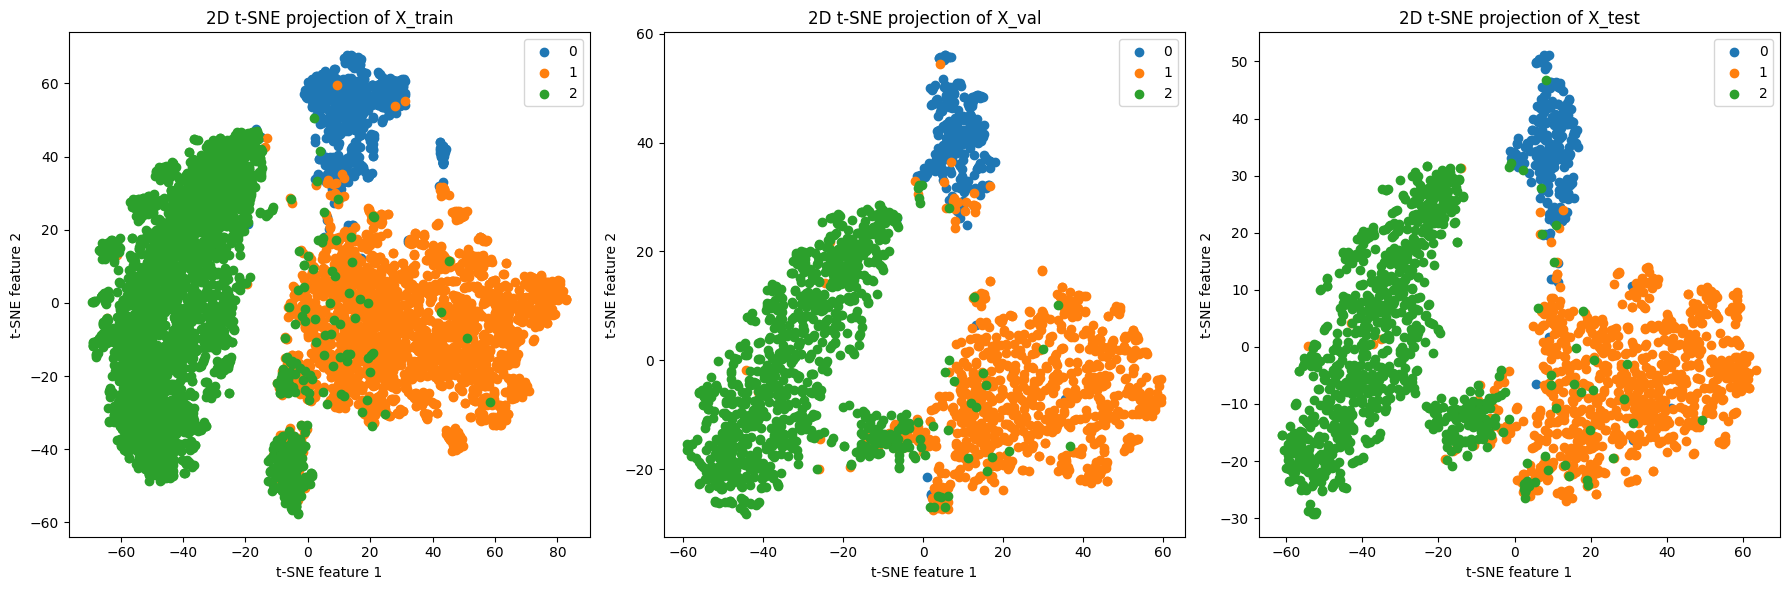

In [71]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=0)

# Apply t-SNE transformation on X_train
X_train_tsne = tsne.fit_transform(X_train_BERT)

# Apply t-SNE transformation on X_val
X_val_tsne = tsne.fit_transform(X_val_BERT)

# Apply t-SNE transformation on X_test
X_test_tsne = tsne.fit_transform(X_test_BERT)

# Plot
plt.figure(figsize=(18, 6))

# Plot for X_train
plt.subplot(1, 3, 1)
unique_labels_train = np.unique(y_train)
for label in unique_labels_train:
    indices = (y_train == label)
    plt.scatter(X_train_tsne[indices, 0], X_train_tsne[indices, 1], label=label)
plt.title('2D t-SNE projection of X_train')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend()

# Plot for X_val
plt.subplot(1, 3, 2)
unique_labels_val = np.unique(y_val)
for label in unique_labels_val:
    indices = (y_val == label)
    plt.scatter(X_val_tsne[indices, 0], X_val_tsne[indices, 1], label=label)
plt.title('2D t-SNE projection of X_val')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend()

# Plot for X_test
plt.subplot(1, 3, 3)
unique_labels_test = np.unique(y_test)
for label in unique_labels_test:
    indices = (y_test == label)
    plt.scatter(X_test_tsne[indices, 0], X_test_tsne[indices, 1], label=label)
plt.title('2D t-SNE projection of X_test')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend()

plt.tight_layout()
plt.show()

There are obvious clustering between 3 labels. Also among label 2 (Results), there are some overlapping with label 1 (methods), some clustering exist.